## Ingeniøren vinteren 2021
Denne aflevering er baseret på en opgave fra ugebladet Ingeniøren i vinteren 2021. 
I opgaven betragtes en person og en klods på et koordinatsystem, hvor personen starter i koordinatet (0,0) og bevæger sig lodret op til punktet (0,2). Imens trækkes klods vha. en snor fra punktet (1,0) langs kurven beskrevet ved ligningen: 

$y(x)=-\int_1^x \frac{\sqrt{1-x'^2}}{x'}dx'$

a) Vi indleder dermed med at skrive en funktion der givet x returnerer y. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import fsolve
import numpy as np

#a
def funktion(x1):
    f=lambda x: -np.sqrt(1-x**2)/x
    y=quad(f,1,x1)[0]
    return y   


b) Vi benytter nu denne funktion til at plotte kurven, y(x), for klodsen i intervallet  $0.2658<x<1$ .

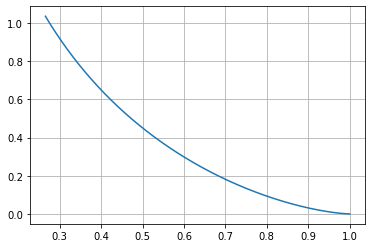

In [2]:
#b
fig, ax = plt.subplots()
ax.grid()

x=np.linspace(0.2658,1,1000)
y=np.zeros(len(x))

for xs in range(len(x)):
    y[xs]=funktion(x[xs])

ax.plot(x,y)

c) Dernæst skrives der en funktion, der løser den følgende ligning, for x for et vilkårligt $y_{person}$: 

$1^2=x^2+[y_{person}-y(x)]^2$

Derudover kaldes funktionen også for $y_{person}=2\;m$ . 




In [3]:
#c
f=lambda x: -np.sqrt(1-x**2)/x
y=lambda x0: quad(f,1,x0)[0]
f1=lambda y_person,x0: x0**2+(y_person-y(x0))**2-1
x0=fsolve(lambda x0: f1(2,x0),0.5)
print(x0)

[0.26580223]


d) Vi bestemmer nu længden klodsen har tilbagelagt når personen er nået til $y_{person}=2\;m$. I koden benyttes følgende ligning til at bestemme kurvelængden, L: 

$L=\int_a^b \sqrt{1+(\frac{dy}{dx}})^2$ .

Hertil kender vi også differentialligningen:

$\frac{dy}{dx}=-\frac{\sqrt{1-x^2}}{x}$ . 



In [4]:
#d
dydx = lambda x:-np.sqrt(1-x**2)/x
quad(lambda x: np.sqrt(1 + dydx(x)**2),x0,1)[0]

1.3250027473578652

e) Til sidst bruger vi nu den viden vi har fra de forrige opgaver til at danne en animation af bevægelserne af personen (p), kassen (k) og snoren mellem dem (s). 

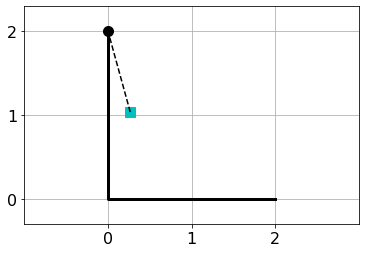

In [17]:
#e
from matplotlib import animation
plt.rc('animation', html='jshtml')
plt.rc('font', size=16)
fig, ax =plt.subplots(1,1)
ax.axis('equal')
ax.grid()
ax.set_xlim(-1,3)
ax.set_ylim(-1,3)
ax.set_xticks(range(3))
ax.set_yticks(range(4))

ax.plot([2,0,0],[0,0,2],lw=3,color='k')
N = 100

#person
ys = np.linspace(0,2,N)
p = ax.plot([],[],'ro',ms=10, color='k')[0]

#kasse

x=np.linspace(1,0.2658,N)
y=np.zeros(len(x))

for xs in range(len(x)):
    y[xs]=funktion(x[xs])

k = ax.plot([],[],'s', ms=10, color='c')[0]

#snor
s = ax.plot([],[],'--',color='k')[0]


def update(i):
    p.set_data(0,ys[i])
    k.set_data(x[i],y[i])
    s.set_data([x[i],0],[y[i],ys[i]])
    return [p,k,s]
  

anim = animation.FuncAnimation(fig,
                               update,
                               frames=N,
                               interval=50,
                               blit=True)
anim